In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

In [ ]:
import keras
keras.__version__

'2.15.0'

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
test_data.shape

(25000,)

In [ ]:
train_labels.shape

(25000,)

In [ ]:
test_labels.shape

(25000,)

In [ ]:
train_data.dtype

dtype('O')

In [ ]:
len(test_data[0])

68

In [ ]:
max(train_data)

[1,
 9995,
 2,
 7,
 2208,
 7335,
 3135,
 4173,
 3783,
 509,
 1683,
 4702,
 2,
 2,
 6,
 201,
 7,
 6415,
 687,
 2,
 2,
 7,
 6387,
 548,
 139,
 7583,
 295,
 34,
 4485,
 5302,
 2,
 2,
 2,
 7,
 2,
 2,
 146,
 24,
 1017,
 2282,
 133,
 21,
 4,
 1591,
 3113,
 786,
 2,
 16,
 125,
 4,
 2,
 9790,
 2039,
 137,
 267,
 2,
 5,
 2,
 120,
 2024,
 980,
 2,
 1248,
 5666,
 727,
 1405,
 6879,
 1060,
 6442,
 18,
 2,
 1461,
 2,
 1883,
 445,
 109,
 5369,
 3696,
 33,
 236,
 786,
 5580,
 7994,
 8,
 2,
 2,
 103,
 2,
 98,
 11,
 2,
 1461,
 24,
 66,
 351,
 1461,
 165,
 116,
 17,
 2545,
 18,
 6717,
 8694,
 5514,
 980,
 2545,
 165,
 734,
 18,
 2311,
 52,
 84,
 157,
 18,
 7232,
 11,
 661,
 8,
 607,
 3531,
 223,
 1066,
 445,
 9236,
 996,
 8,
 2898,
 4931,
 8,
 5526,
 8316,
 7880,
 154,
 378,
 459,
 18,
 6942,
 632,
 5,
 79,
 2024,
 18,
 68,
 4918,
 813,
 2456,
 2,
 17,
 840,
 4807,
 3854,
 23,
 136,
 159,
 5770,
 852,
 1698,
 632,
 7708,
 7993,
 1003,
 1372,
 5747,
 2,
 7,
 5840,
 5408,
 11,
 7200,
 120,
 4682,
 7,
 2,


In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
import collections

In [ ]:
min(word_index, key=word_index.get)

'the'

In [ ]:
max(word_index, key=word_index.get)

"'l'"

In [ ]:
reverse_word_index[9999]

'beaver'

In [ ]:
reverse_word_index.get(9999)

'beaver'

In [ ]:
[x for x in word_index.values()]

[34701,
 52006,
 52007,
 16816,
 63951,
 1408,
 16115,
 2345,
 2289,
 52008,
 52009,
 11307,
 40830,
 30568,
 52010,
 40831,
 52011,
 19313,
 52012,
 52013,
 25242,
 6746,
 52014,
 52015,
 52016,
 68804,
 52017,
 40833,
 34702,
 2338,
 40834,
 34703,
 52018,
 16817,
 1636,
 16818,
 52019,
 34704,
 52020,
 11585,
 57766,
 52021,
 14129,
 52023,
 11038,
 52025,
 29114,
 52027,
 52125,
 40835,
 52028,
 52130,
 34706,
 27631,
 40836,
 15492,
 52030,
 11926,
 4010,
 3230,
 52031,
 34707,
 30585,
 52033,
 40837,
 26338,
 52034,
 30569,
 52035,
 52036,
 40839,
 52037,
 52038,
 11927,
 16819,
 52039,
 25243,
 21905,
 52040,
 40840,
 40841,
 359,
 5034,
 7093,
 21906,
 23379,
 52041,
 52042,
 18510,
 30570,
 9878,
 40842,
 52043,
 52044,
 52045,
 40843,
 34708,
 25244,
 7180,
 52046,
 40844,
 11586,
 20598,
 52047,
 11037,
 52048,
 52049,
 52050,
 17633,
 52051,
 30602,
 40846,
 52052,
 52053,
 23380,
 52054,
 27633,
 52055,
 10307,
 52057,
 42577,
 15493,
 40847,
 52058,
 22922,
 52059,
 27634

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
[reverse_word_index[word] for word in train_data[0]]

['the',
 'as',
 'you',
 'with',
 'out',
 'themselves',
 'powerful',
 'lets',
 'loves',
 'their',
 'becomes',
 'reaching',
 'had',
 'journalist',
 'of',
 'lot',
 'from',
 'anyone',
 'to',
 'have',
 'after',
 'out',
 'atmosphere',
 'never',
 'more',
 'room',
 'and',
 'it',
 'so',
 'heart',
 'shows',
 'to',
 'years',
 'of',
 'every',
 'never',
 'going',
 'and',
 'help',
 'moments',
 'or',
 'of',
 'every',
 'chest',
 'visual',
 'movie',
 'except',
 'her',
 'was',
 'several',
 'of',
 'enough',
 'more',
 'with',
 'is',
 'now',
 'current',
 'film',
 'as',
 'you',
 'of',
 'mine',
 'potentially',
 'unfortunately',
 'of',
 'you',
 'than',
 'him',
 'that',
 'with',
 'out',
 'themselves',
 'her',
 'get',
 'for',
 'was',
 'camp',
 'of',
 'you',
 'movie',
 'sometimes',
 'movie',
 'that',
 'with',
 'scary',
 'but',
 'and',
 'to',
 'story',
 'wonderful',
 'that',
 'in',
 'seeing',
 'in',
 'character',
 'to',
 'of',
 '70s',
 'musicians',
 'with',
 'heart',
 'had',
 'shadows',
 'they',
 'of',
 'here',
 

In [ ]:
decoded_review = [reverse_word_index.get(word - 3) for word in train_data[0]]
decoded_review

[None,
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 None,
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 None,
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 None,
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 '

In [ ]:
import numpy as np
from tqdm import tqdm

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in tqdm(enumerate(sequences)):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

25000it [00:02, 10348.62it/s]
25000it [00:01, 13909.15it/s]


In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take
# into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)
# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found {} unique tokens.'.format(len(word_index)))

Found 9 unique tokens.


In [ ]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
one_hot_results.shape

(2, 1000)

In [ ]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
# INPUT LAYER
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
# HIDDEN LAYERS
model.add(layers.Dense(16, activation="swish"))

# OUTPUT LAYER
model.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

The latter can be done by passing function objects as the `loss` or `metrics` arguments:

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.rmsprop_v2.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
x_val = x_train[:10000]
rest_of_x = x_train[10000:]

y_val = y_train[:10000]
rest_of_y = y_train[10000:]

In [ ]:
history = model.fit(rest_of_x, rest_of_y, epochs=20, validation_data=(x_val, y_val), batch_size=512)

Epoch 1/20
30/30 [==============================] - 4s 101ms/step - loss: 0.5844 - accuracy: 0.7596 - val_loss: 0.4405 - val_accuracy: 0.8494
Epoch 2/20
30/30 [==============================] - 2s 51ms/step - loss: 0.3263 - accuracy: 0.8929 - val_loss: 0.3074 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2074 - accuracy: 0.9304 - val_loss: 0.2797 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1503 - accuracy: 0.9519 - val_loss: 0.2870 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1131 - accuracy: 0.9668 - val_loss: 0.3038 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 2s 59ms/step - loss: 0.0853 - accuracy: 0.9783 - val_loss: 0.3250 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0643 - accuracy: 0.9857 - val_loss: 0.3614 - val_accuracy: 0.8783
Epoch 8/20
3

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

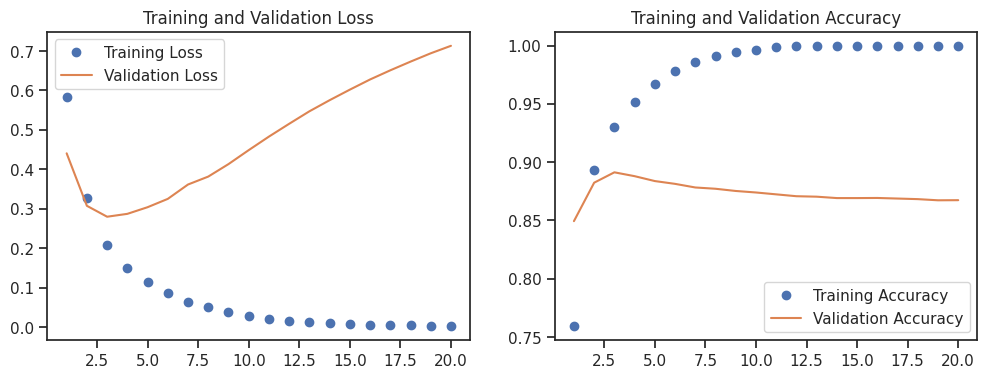

In [ ]:
#  metrics
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs_range = range(1, len(train_loss) + 1)

# Training / Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, 'o', label='Training Loss')  # Dots for Training Loss
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Training / Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, 'o', label='Training Accuracy')  # Dots for Training Accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
# MODEL 2

model_2 = models.Sequential()
# INPUT LAYER
model_2.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
# HIDDEN LAYERS
model_2.add(layers.Dense(16, activation="swish"))
model_2.add(layers.Dense(8, activation="swish"))


# OUTPUT LAYER
model_2.add(layers.Dense(1, activation="sigmoid"))

model_2.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
history = model_2.fit(rest_of_x, rest_of_y, epochs=20, validation_data=(x_val, y_val), batch_size=512)

Epoch 1/20
30/30 [==============================] - 5s 118ms/step - loss: 0.6101 - accuracy: 0.7393 - val_loss: 0.4846 - val_accuracy: 0.8407
Epoch 2/20
30/30 [==============================] - 2s 67ms/step - loss: 0.3498 - accuracy: 0.8904 - val_loss: 0.3052 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2018 - accuracy: 0.9303 - val_loss: 0.2826 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1363 - accuracy: 0.9561 - val_loss: 0.3076 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0921 - accuracy: 0.9721 - val_loss: 0.3454 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 3s 103ms/step - loss: 0.0610 - accuracy: 0.9852 - val_loss: 0.3974 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 3s 97ms/step - loss: 0.0408 - accuracy: 0.9918 - val_loss: 0.4541 - val_accuracy: 0.8761
Epoch 8/20


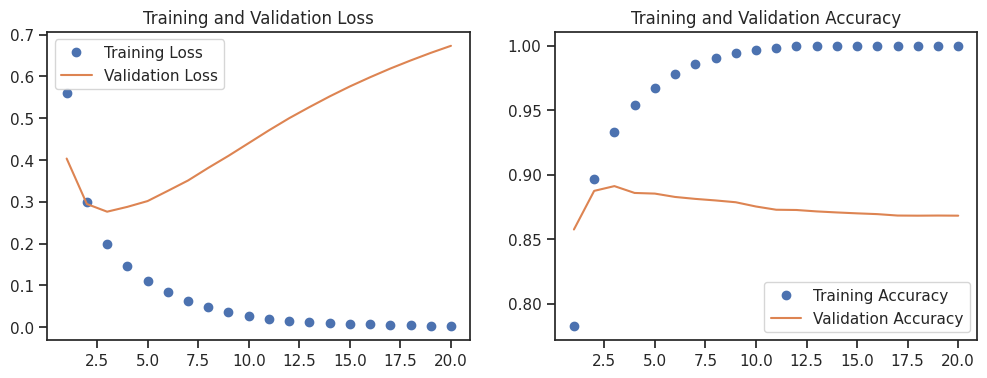

In [ ]:
#  metrics
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs_range = range(1, len(train_loss) + 1)

# Training / Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, 'o', label='Training Loss')  # Dots for Training Loss
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Training / Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, 'o', label='Training Accuracy')  # Dots for Training Accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
# model 3

model_3 = models.Sequential()
# INPUT LAYER
model_3.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
# normalization and dropout
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.3))
# HIDDEN LAYERS
model_3.add(layers.Dense(64, activation="leaky_relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.3))

model_3.add(layers.Dense(32, activation="swish"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.3))

model_3.add(layers.Dense(16, activation="swish"))
model_3.add(layers.BatchNormalization())


# OUTPUT LAYER
model_3.add(layers.Dense(1, activation="sigmoid"))

model_3.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])


In [ ]:
history = model_3.fit(rest_of_x, rest_of_y, epochs=25, validation_data=(x_val, y_val), batch_size=512)

Epoch 1/25
30/30 [==============================] - 6s 125ms/step - loss: 0.6356 - accuracy: 0.6626 - val_loss: 0.6415 - val_accuracy: 0.8141
Epoch 2/25
30/30 [==============================] - 2s 62ms/step - loss: 0.3821 - accuracy: 0.8377 - val_loss: 0.5387 - val_accuracy: 0.8494
Epoch 3/25
30/30 [==============================] - 2s 58ms/step - loss: 0.2639 - accuracy: 0.8991 - val_loss: 0.4232 - val_accuracy: 0.8817
Epoch 4/25
30/30 [==============================] - 1s 47ms/step - loss: 0.1956 - accuracy: 0.9283 - val_loss: 0.3470 - val_accuracy: 0.8802
Epoch 5/25
30/30 [==============================] - 1s 46ms/step - loss: 0.1490 - accuracy: 0.9455 - val_loss: 0.3167 - val_accuracy: 0.8691
Epoch 6/25
30/30 [==============================] - 1s 46ms/step - loss: 0.1198 - accuracy: 0.9595 - val_loss: 0.3006 - val_accuracy: 0.8739
Epoch 7/25
30/30 [==============================] - 1s 45ms/step - loss: 0.0999 - accuracy: 0.9682 - val_loss: 0.3135 - val_accuracy: 0.8699
Epoch 8/25
3

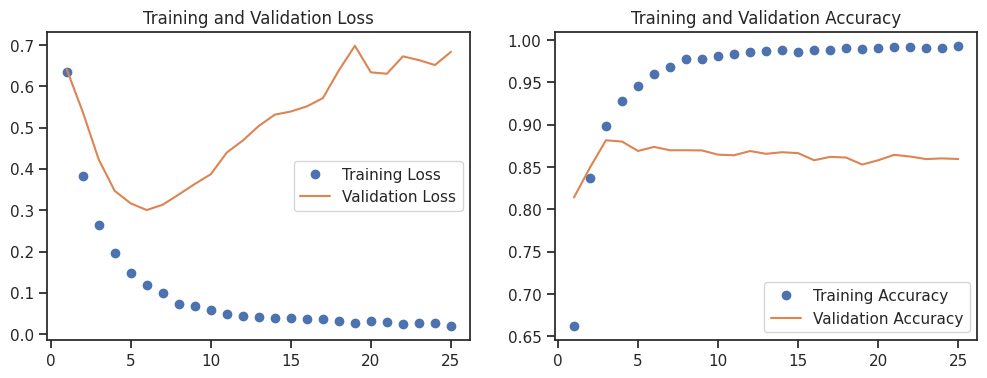

In [ ]:
history_dict = history.history

#  metrics
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs_range = range(1, len(train_loss) + 1)

# Training / Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, 'o', label='Training Loss')  # Dots for Training Loss
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Training / Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, 'o', label='Training Accuracy')  # Dots for Training Accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
# model 4

model_4 = models.Sequential()
# INPUT LAYER
model_4.add(layers.Dense(128, activation="relu", input_shape=(10000, )))
# normalization and dropout
model_4.add(layers.BatchNormalization())
model_4.add(layers.Dropout(0.3))
# HIDDEN LAYERS
model_4.add(layers.Dense(256, activation="leaky_relu"))
model_4.add(layers.BatchNormalization())
model_4.add(layers.Dropout(0.3))

model_4.add(layers.Dense(128, activation="relu"))
model_4.add(layers.BatchNormalization())
model_4.add(layers.Dropout(0.3))

# LSTM LAYER
model_4.add(layers.Reshape((128, 1)))
model_4.add(layers.LSTM(64, return_sequences=False))
model_4.add(layers.BatchNormalization())
model_4.add(layers.Dropout(0.3))

# ONE MORE DENSE LAYER
model_4.add(layers.Dense(16, activation="swish"))
model_4.add(layers.BatchNormalization())

# OUTPUT LAYER
model_4.add(layers.Dense(1, activation="sigmoid"))


model_4.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
history = model_4.fit(rest_of_x, rest_of_y, epochs=30, validation_data=(x_val, y_val), batch_size=256)

Epoch 1/30
59/59 [==============================] - 31s 444ms/step - loss: 0.4968 - accuracy: 0.7483 - val_loss: 0.6403 - val_accuracy: 0.7095
Epoch 2/30
59/59 [==============================] - 24s 398ms/step - loss: 0.2479 - accuracy: 0.9032 - val_loss: 0.5412 - val_accuracy: 0.8627
Epoch 3/30
59/59 [==============================] - 25s 419ms/step - loss: 0.1411 - accuracy: 0.9473 - val_loss: 0.4427 - val_accuracy: 0.8497
Epoch 4/30
59/59 [==============================] - 27s 457ms/step - loss: 0.0817 - accuracy: 0.9714 - val_loss: 0.3260 - val_accuracy: 0.8738
Epoch 5/30
59/59 [==============================] - 28s 480ms/step - loss: 0.0508 - accuracy: 0.9833 - val_loss: 0.3140 - val_accuracy: 0.8734
Epoch 6/30
59/59 [==============================] - 28s 484ms/step - loss: 0.0408 - accuracy: 0.9865 - val_loss: 0.3458 - val_accuracy: 0.8727
Epoch 7/30
59/59 [==============================] - 24s 409ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.4054 - val_accuracy: 0.8685

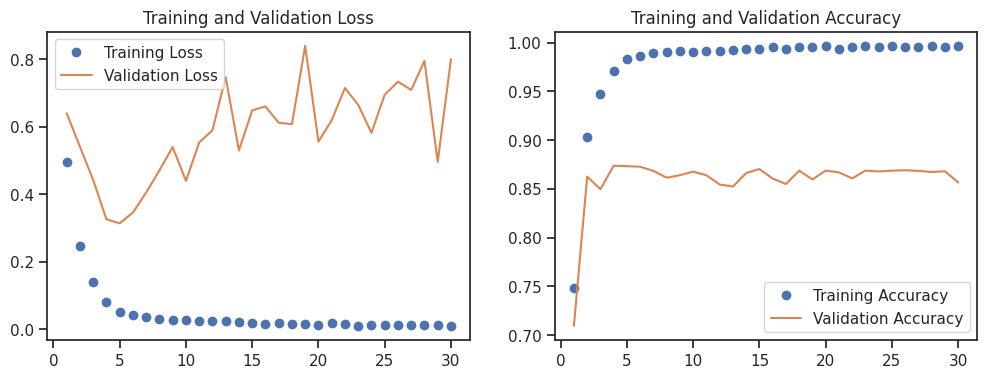

In [ ]:
history_dict = history.history

#  metrics
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs_range = range(1, len(train_loss) + 1)

# Training / Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, 'o', label='Training Loss')  # Dots for Training Loss
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Training / Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, 'o', label='Training Accuracy')  # Dots for Training Accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()